In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5138,ham,Yup... I havent been there before... You want ...,NaN,NaN,NaN
3749,ham,"Buzz! Hey, my Love ! I think of you and hope y...",NaN,NaN,NaN
3613,ham,Ok c Ì_ then.,NaN,NaN,NaN
231,ham,Dear we are going to our rubber place,NaN,NaN,NaN
708,spam,To review and KEEP the fantastic Nokia N-Gage ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
5158,ham,I will come with karnan car. Please wait till ...
2972,ham,Happy New Year Princess!
26,ham,Lol your always so convincing.
4377,ham,"Doing nothing, then u not having dinner w us?"
3659,ham,I will reach ur home in &lt;#&gt; minutes


In [9]:
# Rename
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [10]:
df.sample(5)

,target,text
5528,ham,Its just the effect of irritation. Just ignore it
5070,ham,As in different styles?
2452,ham,Okay. I've seen it. So i should pick it on fri...
3192,ham,I will lick up every drop :) are you ready to ...
552,ham,"Sure, if I get an acknowledgement from you tha..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# Check duplicate
df.duplicated().sum()

403

In [16]:
# Remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# 2. EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

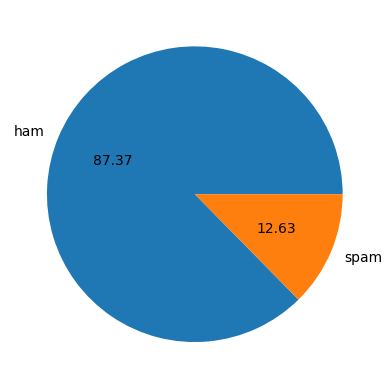

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [22]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
!pip install nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# Num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
 df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# Ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# Spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

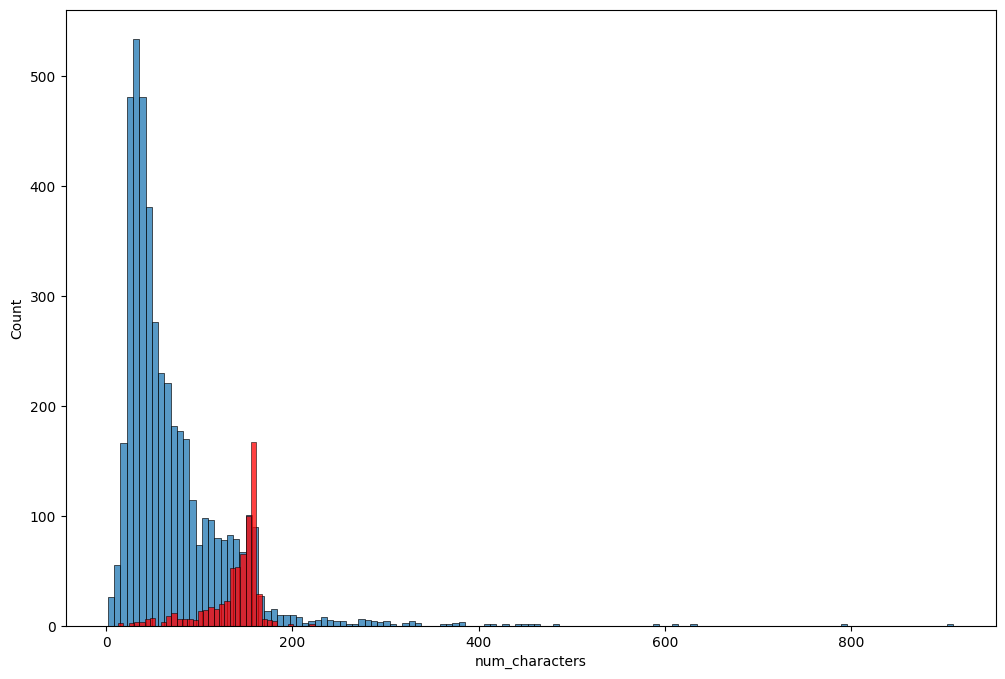

In [36]:
plt.figure(figsize=(12, 8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

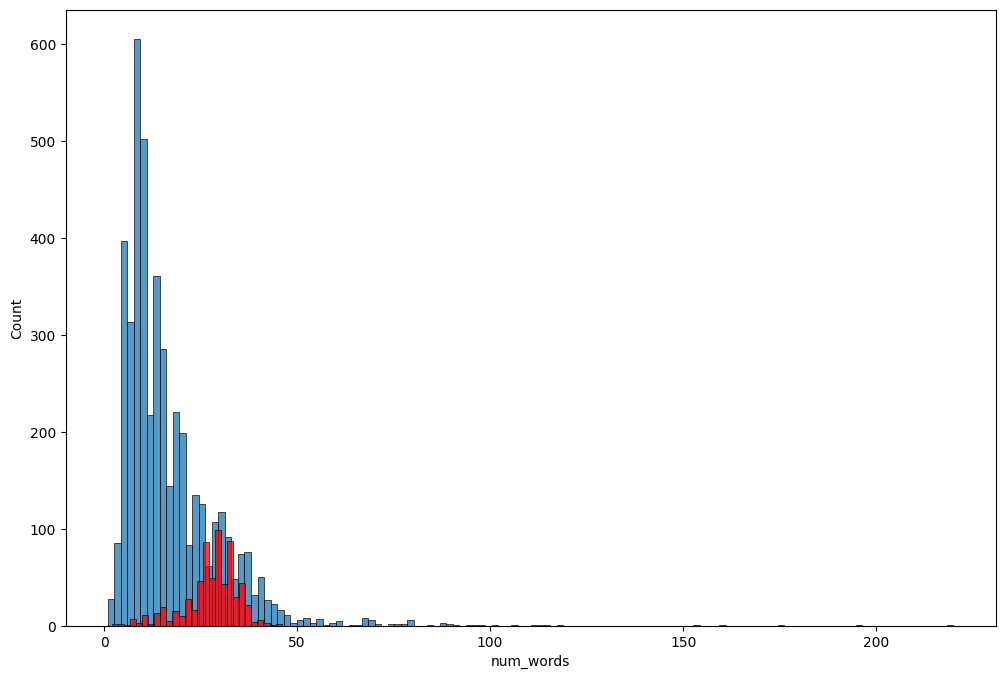

In [37]:
plt.figure(figsize=(12, 8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

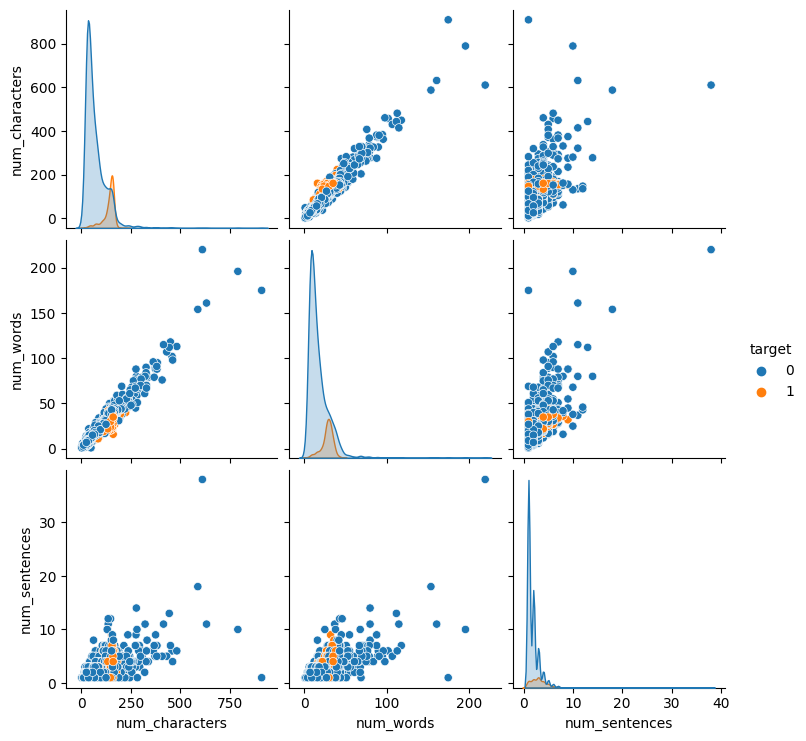

In [38]:
sns.pairplot(df, hue='target')

<ipython-input-39-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

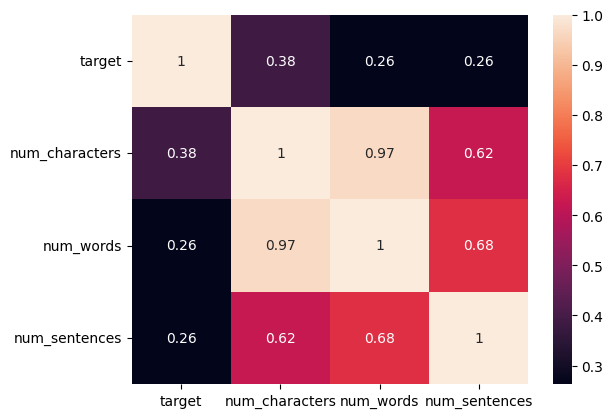

In [39]:
sns.heatmap(df.corr(), annot=True)

# 3. Data Preprocessing
## Lower case
## Tokenization
## Remove special characters
## Remove stop words and punctuation
## Stemming

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [45]:
df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
pip install -c conda-forge wordcloud

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

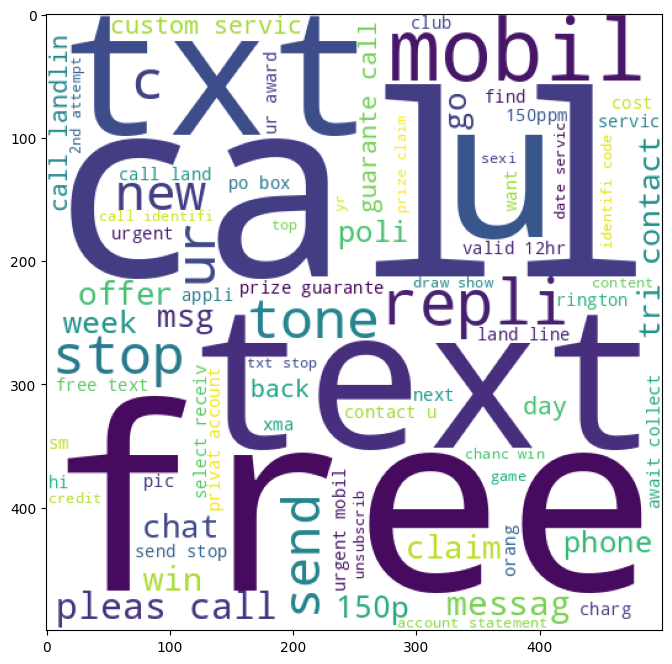

In [50]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

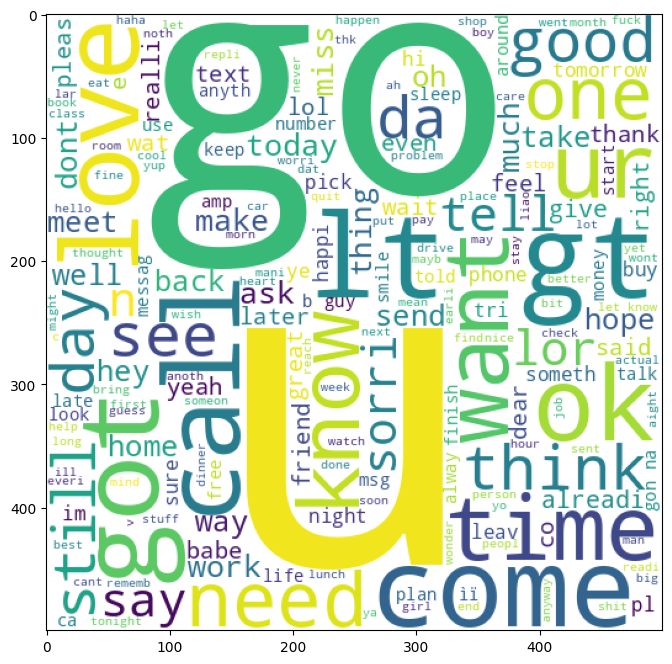

In [52]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

9939

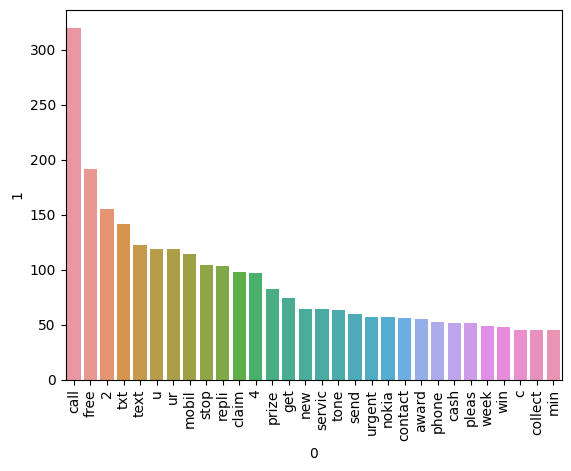

In [56]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35404

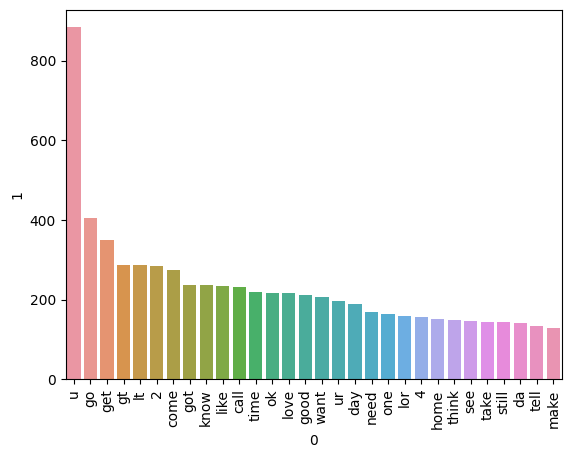

In [59]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
X.shape

(5169, 3000)

In [64]:
y = df['target'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report,recall_score, f1_score

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

svc = SVC(kernel='sigmoid', gamma=1.0)

knc = KNeighborsClassifier()

mnb = MultinomialNB()

dtc = DecisionTreeClassifier(max_depth=5)

lrc = LogisticRegression(solver='liblinear', penalty='l1')

rfc = RandomForestClassifier(n_estimators=50, random_state=2)

abc = AdaBoostClassifier(n_estimators=50, random_state=2)

bc = BaggingClassifier(n_estimators=50, random_state=2)

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

xgb = XGBClassifier(n_estimators=50,random_state=2)

Accurary score:  0.9671179883945842
Precision score:  0.9262295081967213
recall score:  0.8188405797101449
F1 score:  0.8692307692307691
Classification report:                precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.93      0.82      0.87       138

    accuracy                           0.97      1034
   macro avg       0.95      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

Confusion maxtrix:
[[887   9]
 [ 25 113]]


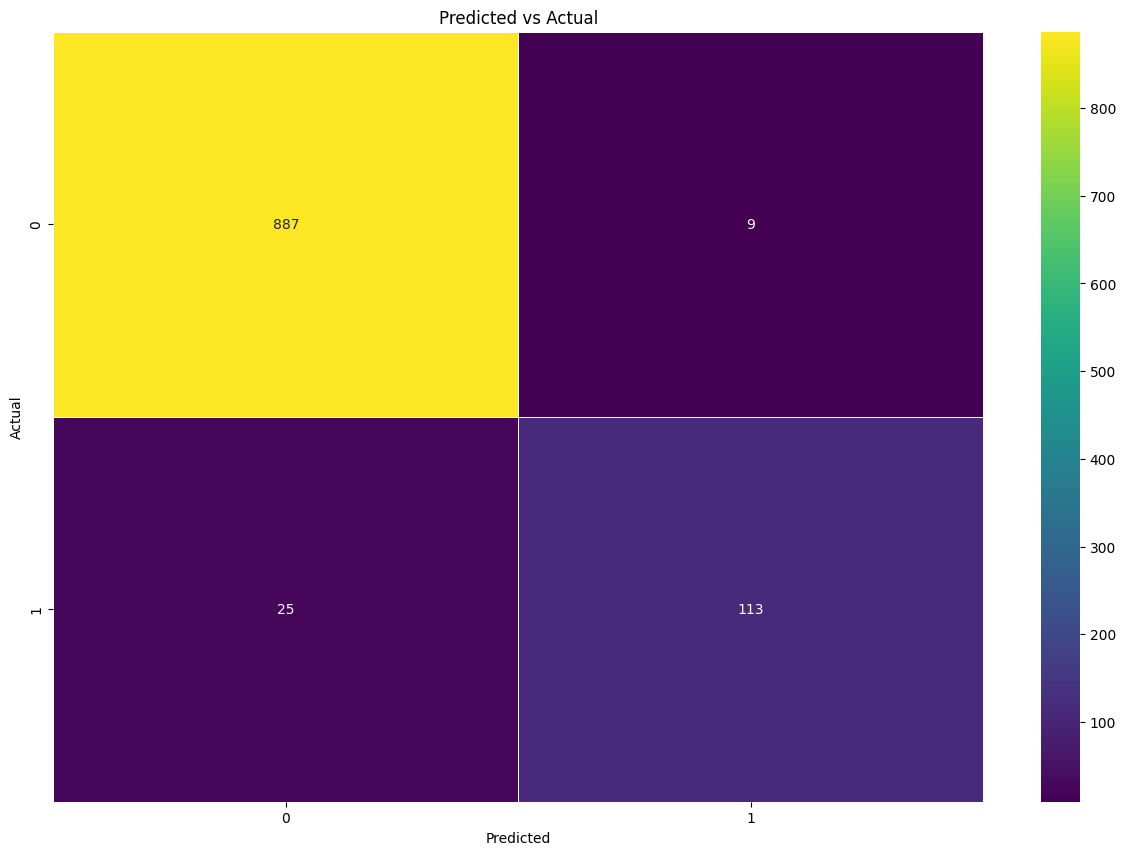

In [87]:
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))
cm_xgb = confusion_matrix(y_test, y_pred1);

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_xgb, annot=True, linewidth=0.5, fmt=".0f",cmap="viridis", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

Accurary score:  0.9468085106382979
Precision score:  0.9191919191919192
recall score:  0.6594202898550725
F1 score:  0.7679324894514767
Classification report:                precision    recall  f1-score   support

           0       0.95      0.99      0.97       896
           1       0.92      0.66      0.77       138

    accuracy                           0.95      1034
   macro avg       0.93      0.83      0.87      1034
weighted avg       0.95      0.95      0.94      1034

Confusion maxtrix:
[[888   8]
 [ 47  91]]


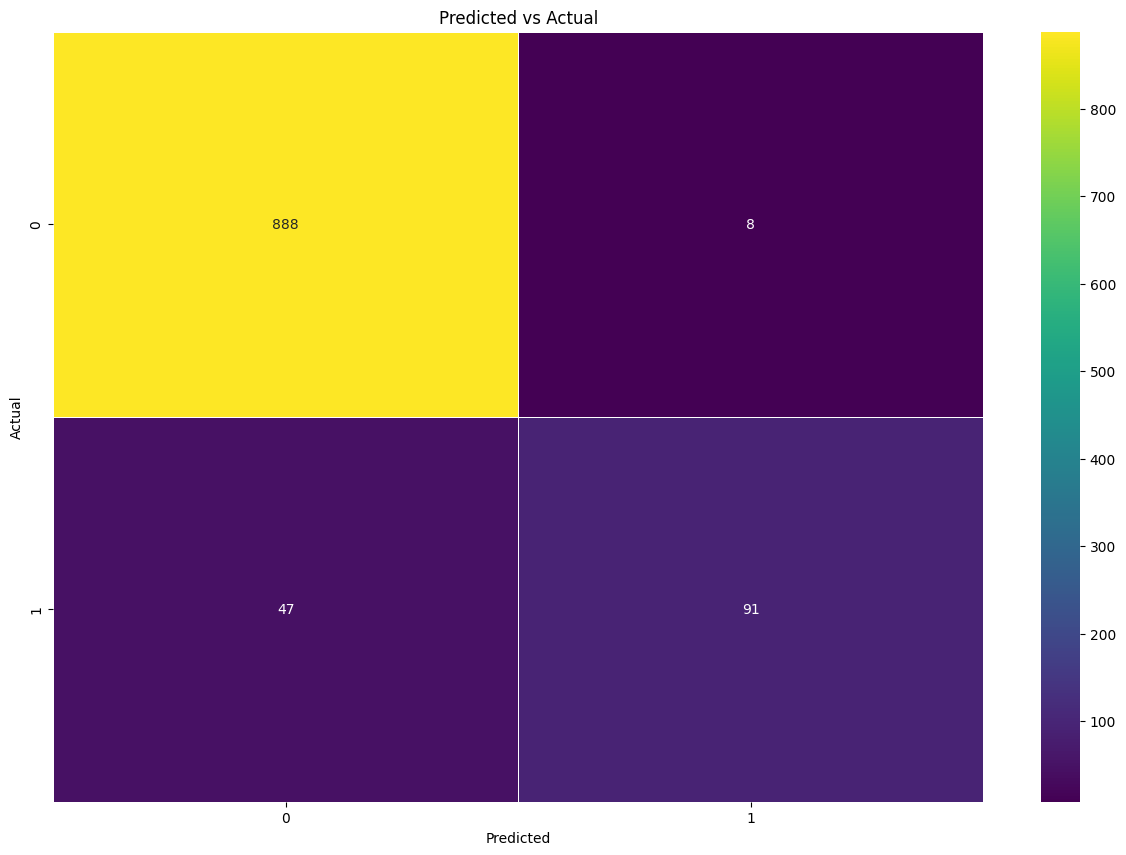

In [88]:
gbdt.fit(X_train,y_train)
y_pred1 = gbdt.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))
cm_gbdt = confusion_matrix(y_test, y_pred1);

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_gbdt, annot=True, linewidth=0.5, fmt=".0f",cmap="viridis", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

Accurary score:  0.9748549323017408
Precision score:  0.9745762711864406
recall score:  0.8333333333333334
F1 score:  0.8984375
Classification report:                precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.97      0.83      0.90       138

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

Confusion maxtrix:
[[893   3]
 [ 23 115]]


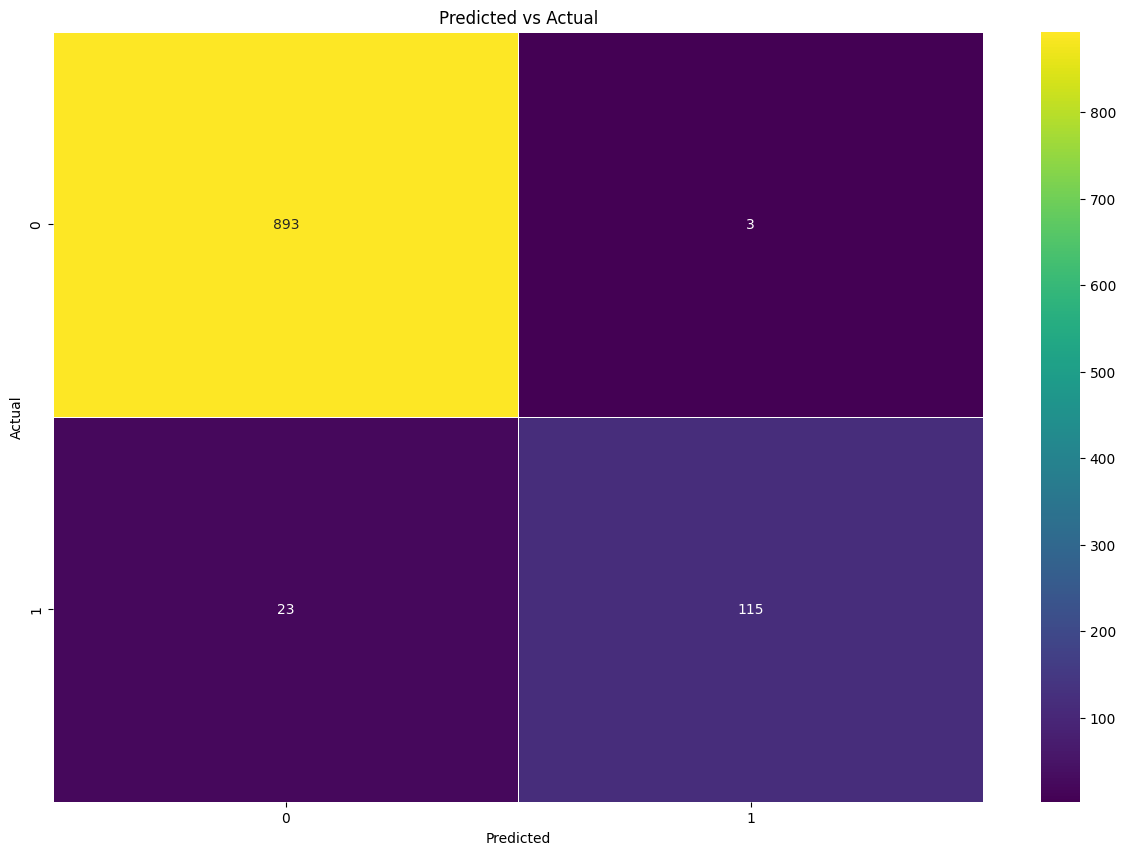

In [89]:
etc.fit(X_train,y_train)
y_pred1 = etc.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))
cm_etc = confusion_matrix(y_test, y_pred1);

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_etc, annot=True, linewidth=0.5, fmt=".0f",cmap="viridis", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

Accurary score:  0.9584139264990329
Precision score:  0.8682170542635659
recall score:  0.8115942028985508
F1 score:  0.8389513108614233
Classification report:                precision    recall  f1-score   support

           0       0.97      0.98      0.98       896
           1       0.87      0.81      0.84       138

    accuracy                           0.96      1034
   macro avg       0.92      0.90      0.91      1034
weighted avg       0.96      0.96      0.96      1034

Confusion maxtrix:
[[879  17]
 [ 26 112]]


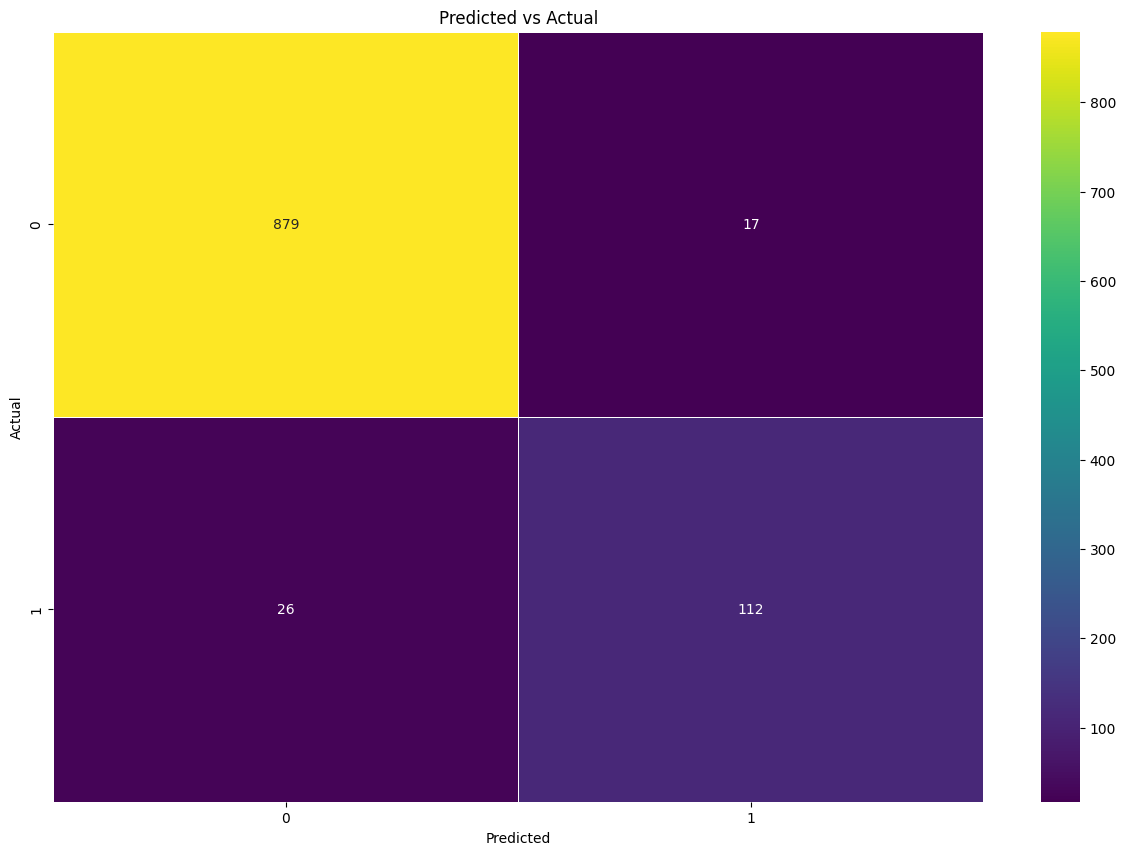

In [90]:
bc.fit(X_train,y_train)
y_pred1 = bc.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))
cm_bc = confusion_matrix(y_test, y_pred1);

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_bc, annot=True, linewidth=0.5, fmt=".0f",cmap="viridis", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

Accurary score:  0.960348162475822
Precision score:  0.9292035398230089
recall score:  0.7608695652173914
F1 score:  0.8366533864541833
Classification report:                precision    recall  f1-score   support

           0       0.96      0.99      0.98       896
           1       0.93      0.76      0.84       138

    accuracy                           0.96      1034
   macro avg       0.95      0.88      0.91      1034
weighted avg       0.96      0.96      0.96      1034

Confusion maxtrix:
[[888   8]
 [ 33 105]]


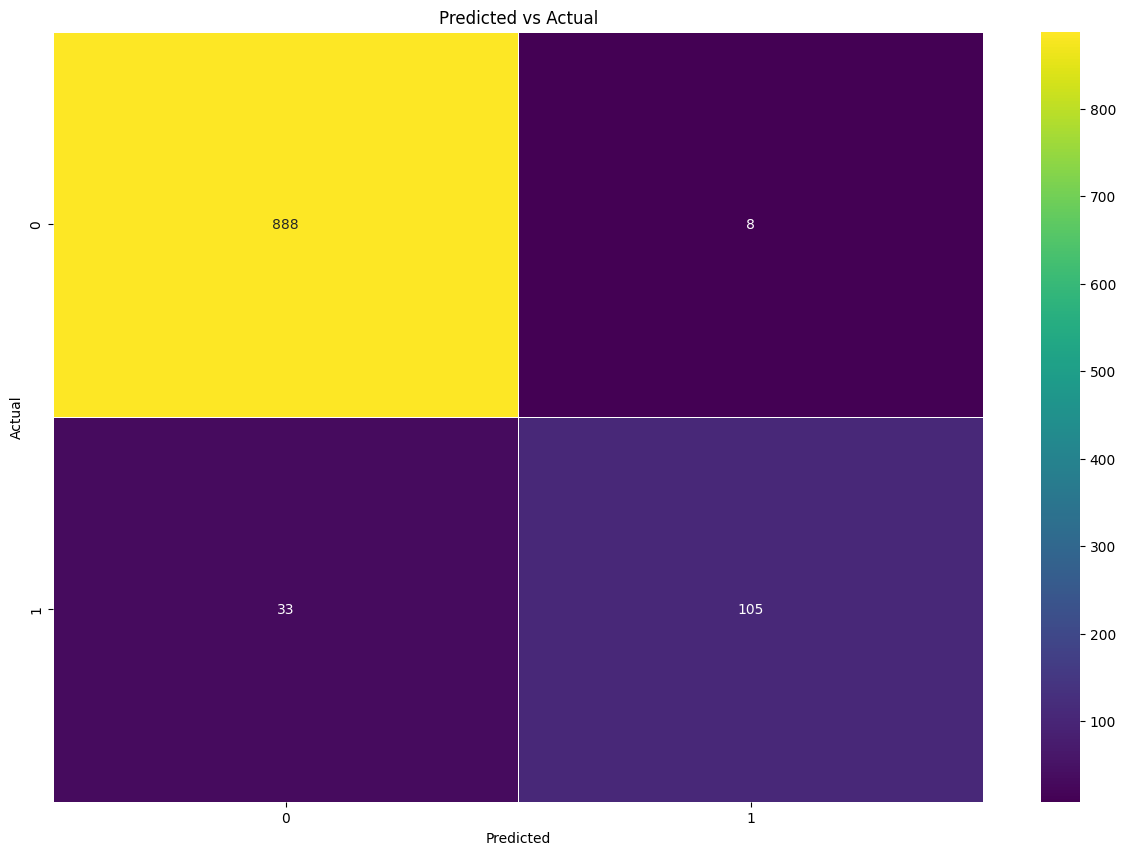

In [91]:
abc.fit(X_train,y_train)
y_pred1 = abc.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))
cm_abc = confusion_matrix(y_test, y_pred1);

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_abc, annot=True, linewidth=0.5, fmt=".0f",cmap="viridis", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

Accurary score:  0.9758220502901354
Precision score:  0.9829059829059829
recall score:  0.8333333333333334
F1 score:  0.9019607843137254
Classification report:                precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.98      0.83      0.90       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.98      0.98      0.97      1034

Confusion maxtrix:
[[894   2]
 [ 23 115]]


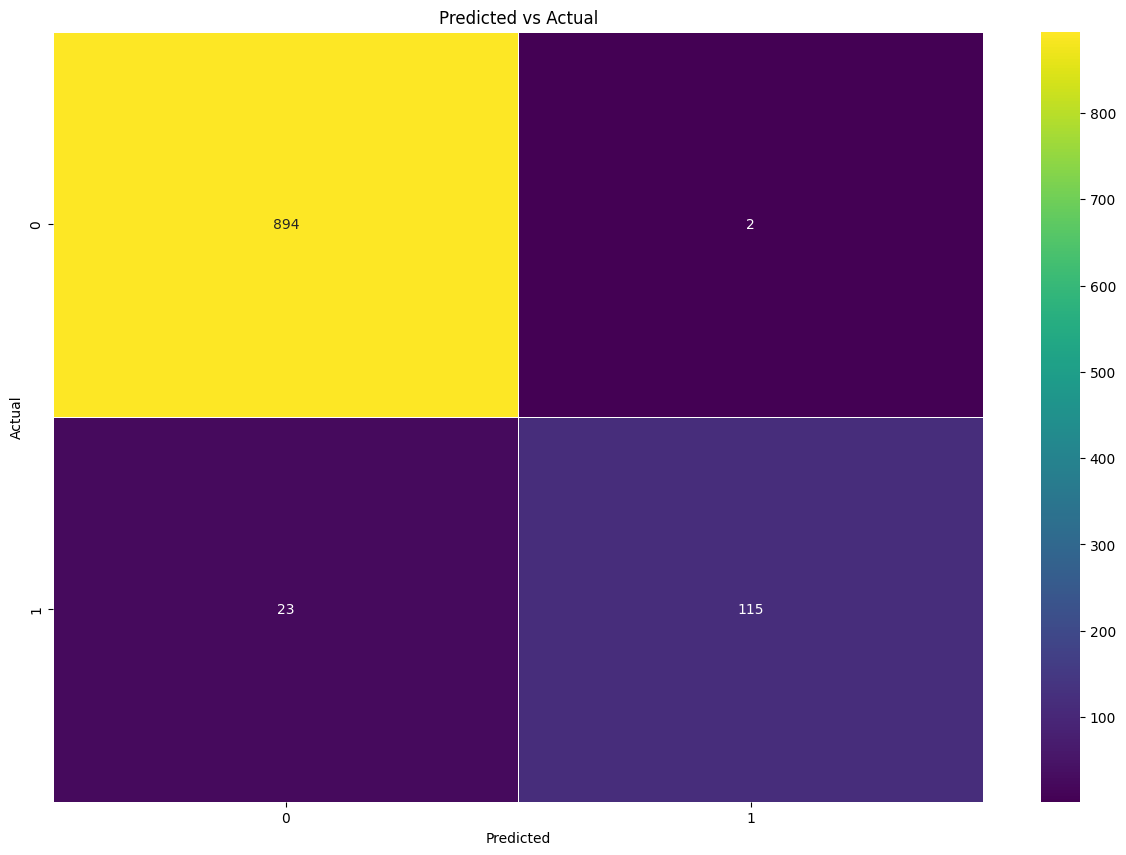

In [92]:
rfc.fit(X_train,y_train)
y_pred1 = rfc.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))
cm_rfc = confusion_matrix(y_test, y_pred1);

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rfc, annot=True, linewidth=0.5, fmt=".0f",cmap="viridis", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

Accurary score:  0.9584139264990329
Precision score:  0.9702970297029703
recall score:  0.7101449275362319
F1 score:  0.8200836820083682
Classification report:                precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       0.97      0.71      0.82       138

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034

Confusion maxtrix:
[[893   3]
 [ 40  98]]


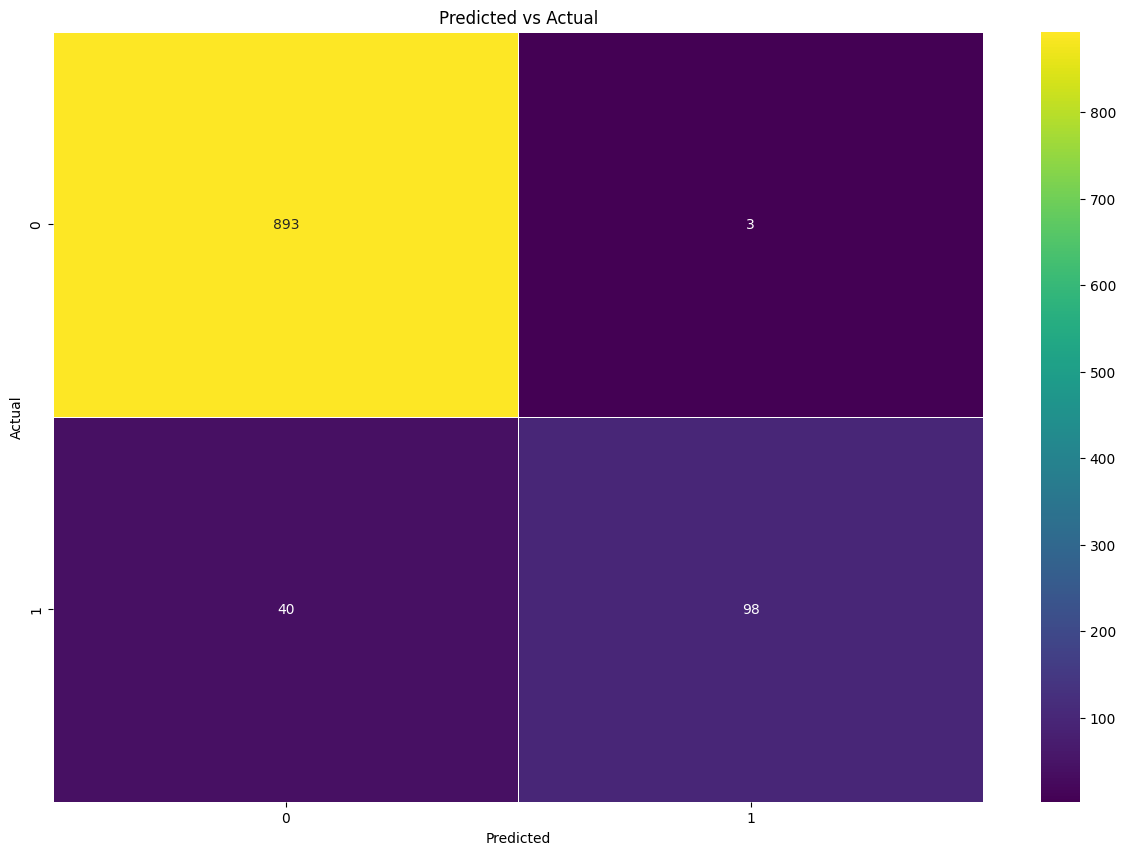

In [93]:
lrc.fit(X_train,y_train)
y_pred1 = lrc.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))

cm_lrc = confusion_matrix(y_test, y_pred1);
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_lrc, annot=True, linewidth=0.5, fmt=".0f",cmap="viridis", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

Accurary score:  0.9323017408123792
Precision score:  0.8333333333333334
recall score:  0.6159420289855072
F1 score:  0.7083333333333333
Classification report:                precision    recall  f1-score   support

           0       0.94      0.98      0.96       896
           1       0.83      0.62      0.71       138

    accuracy                           0.93      1034
   macro avg       0.89      0.80      0.84      1034
weighted avg       0.93      0.93      0.93      1034

Confusion maxtrix:
[[879  17]
 [ 53  85]]


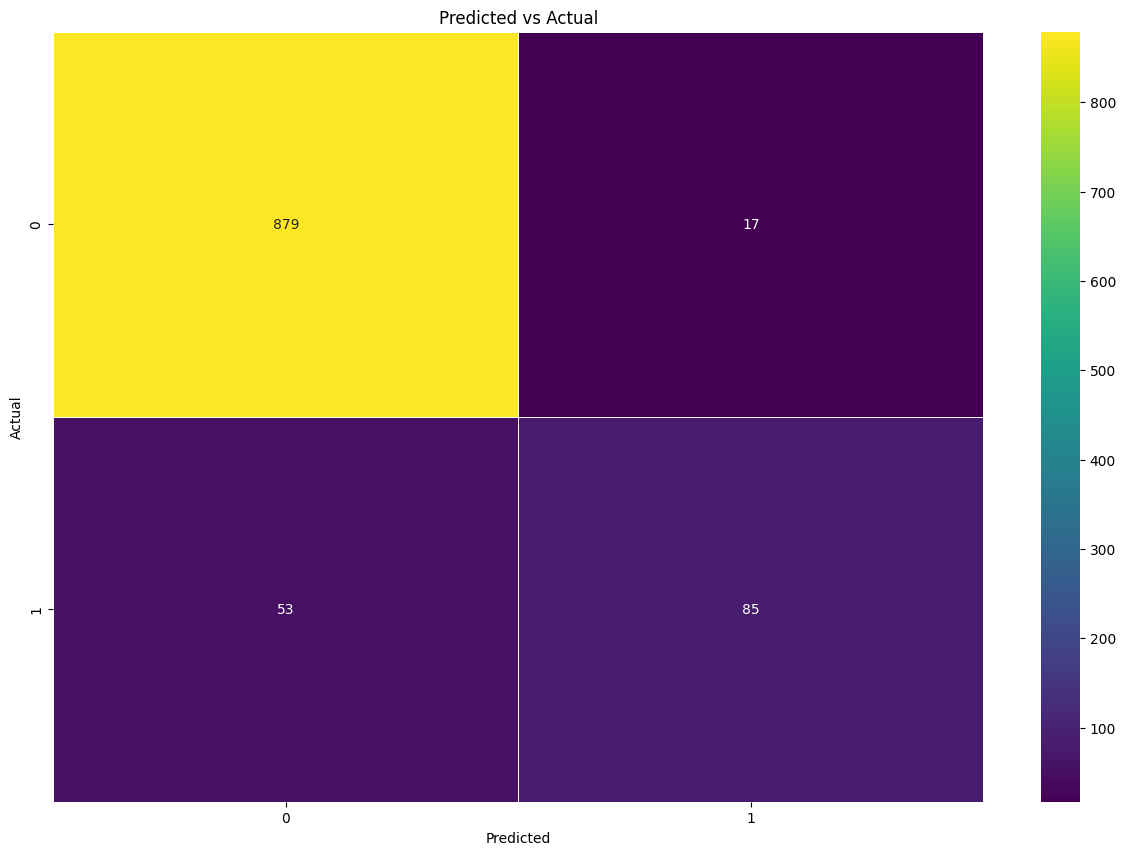

In [94]:
dtc.fit(X_train,y_train)
y_pred1 = dtc.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))
cm_dtc = confusion_matrix(y_test, y_pred1);

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dtc, annot=True, linewidth=0.5, fmt=".0f",cmap="viridis", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

Accurary score:  0.9709864603481625
Precision score:  1.0
recall score:  0.782608695652174
F1 score:  0.878048780487805
Classification report:                precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

Confusion maxtrix:
[[896   0]
 [ 30 108]]


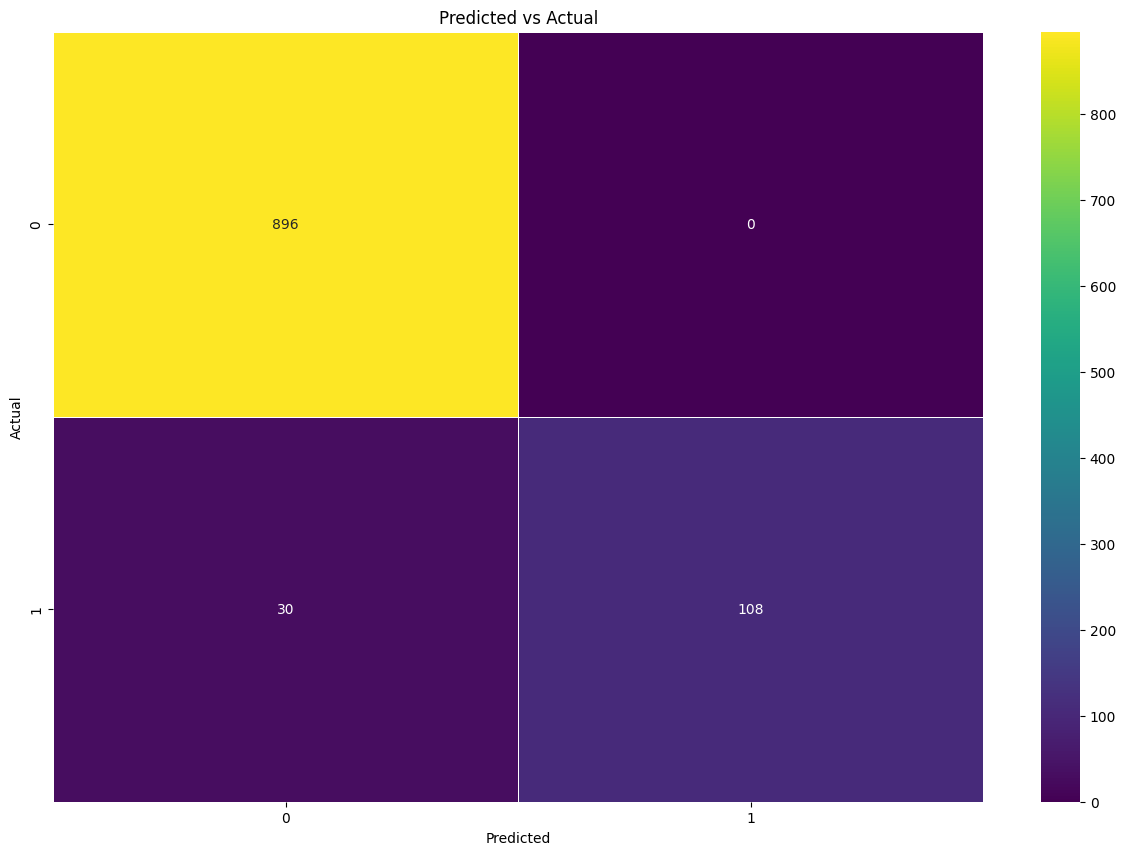

In [95]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))
cm_mnb = confusion_matrix(y_test, y_pred1);

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_mnb, annot=True, linewidth=0.5, fmt=".0f",cmap="viridis", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

Accurary score:  0.9052224371373307
Precision score:  1.0
recall score:  0.2898550724637681
F1 score:  0.44943820224719105
Classification report:                precision    recall  f1-score   support

           0       0.90      1.00      0.95       896
           1       1.00      0.29      0.45       138

    accuracy                           0.91      1034
   macro avg       0.95      0.64      0.70      1034
weighted avg       0.91      0.91      0.88      1034

Confusion maxtrix:
[[896   0]
 [ 98  40]]


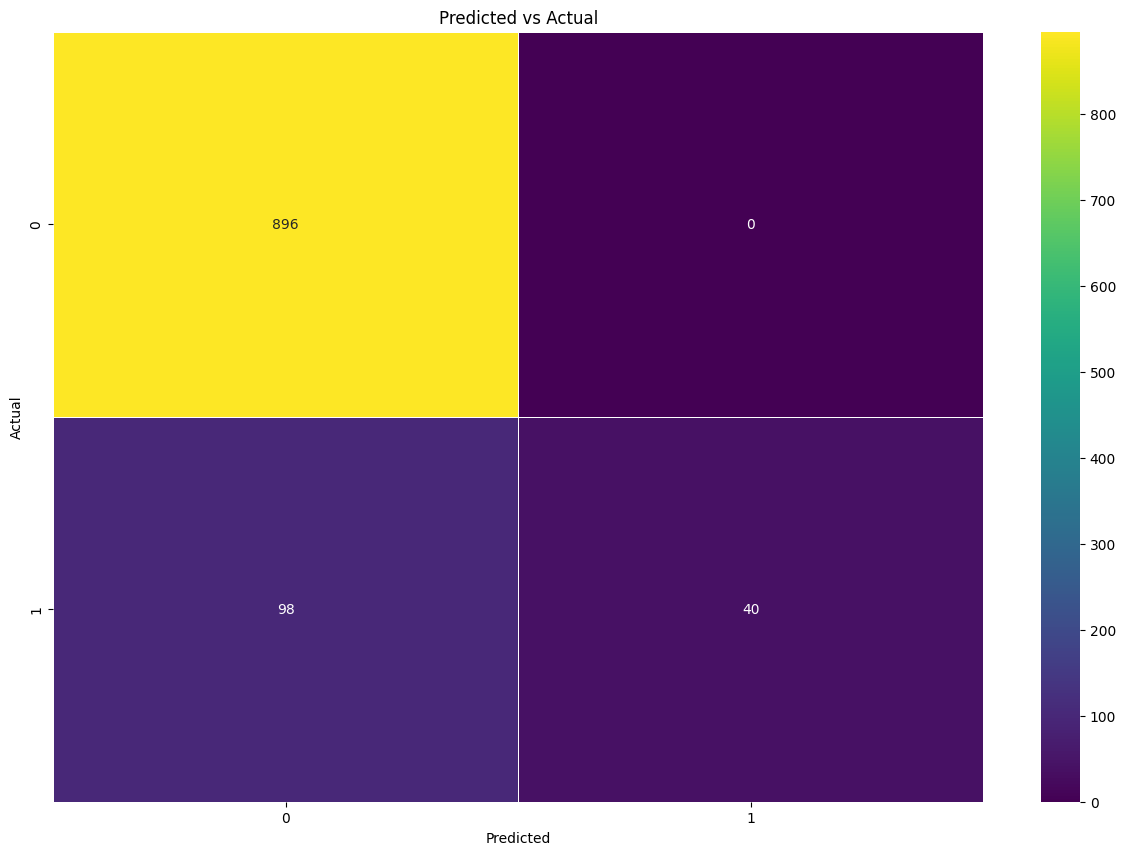

In [96]:
knc.fit(X_train,y_train)
y_pred1 = knc.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))

cm_knc = confusion_matrix(y_test, y_pred1);
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knc, annot=True, linewidth=0.5, fmt=".0f",cmap="viridis", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

Accurary score:  0.9758220502901354
Precision score:  0.9747899159663865
recall score:  0.8405797101449275
F1 score:  0.9027237354085604
Classification report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.97      0.84      0.90       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.98      0.98      0.98      1034

Confusion maxtrix:
[[893   3]
 [ 22 116]]


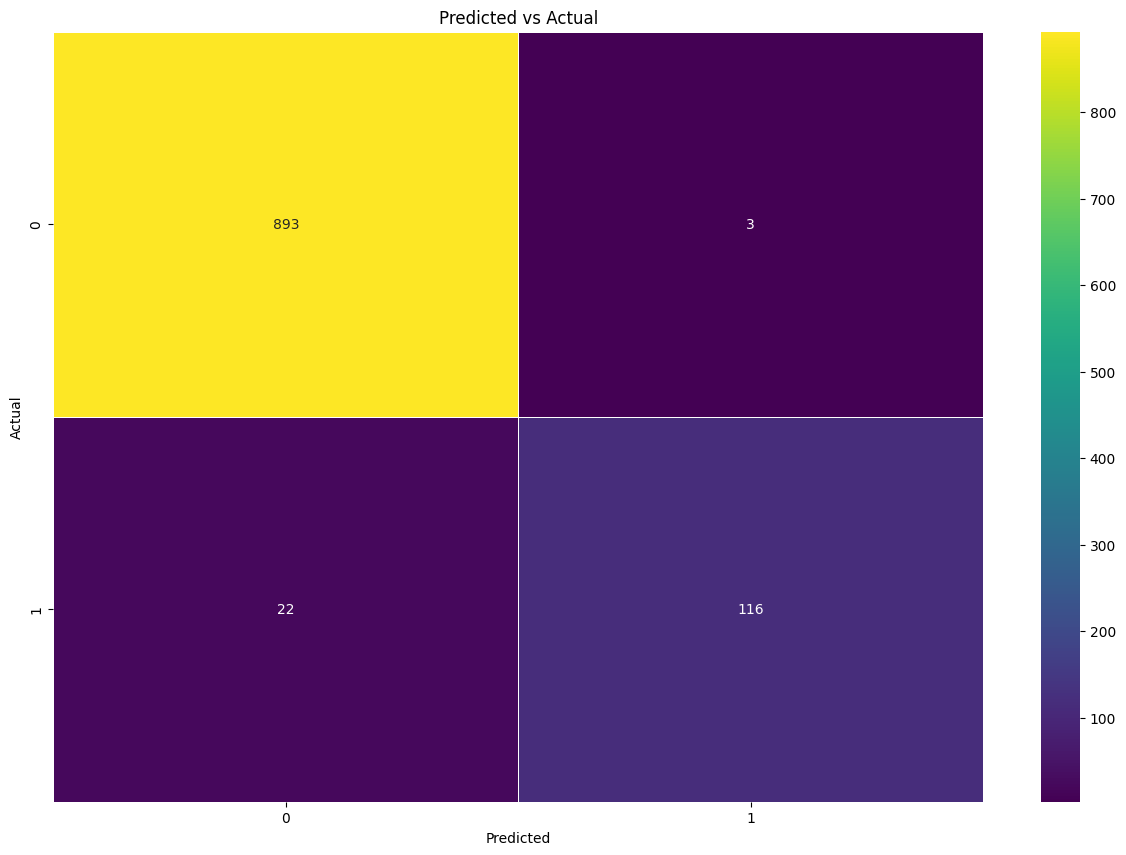

In [97]:
svc.fit(X_train,y_train)
y_pred1 = svc.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))

cm_svc = confusion_matrix(y_test, y_pred1);
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_svc, annot=True, linewidth=0.5, fmt=".0f",cmap="viridis", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

Accurary score:  0.8694390715667312
Precision score:  0.5068493150684932
recall score:  0.8043478260869565
F1 score:  0.6218487394957983
Classification report:                precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.80      0.62       138

    accuracy                           0.87      1034
   macro avg       0.74      0.84      0.77      1034
weighted avg       0.91      0.87      0.88      1034

Confusion maxtrix:
[[788 108]
 [ 27 111]]


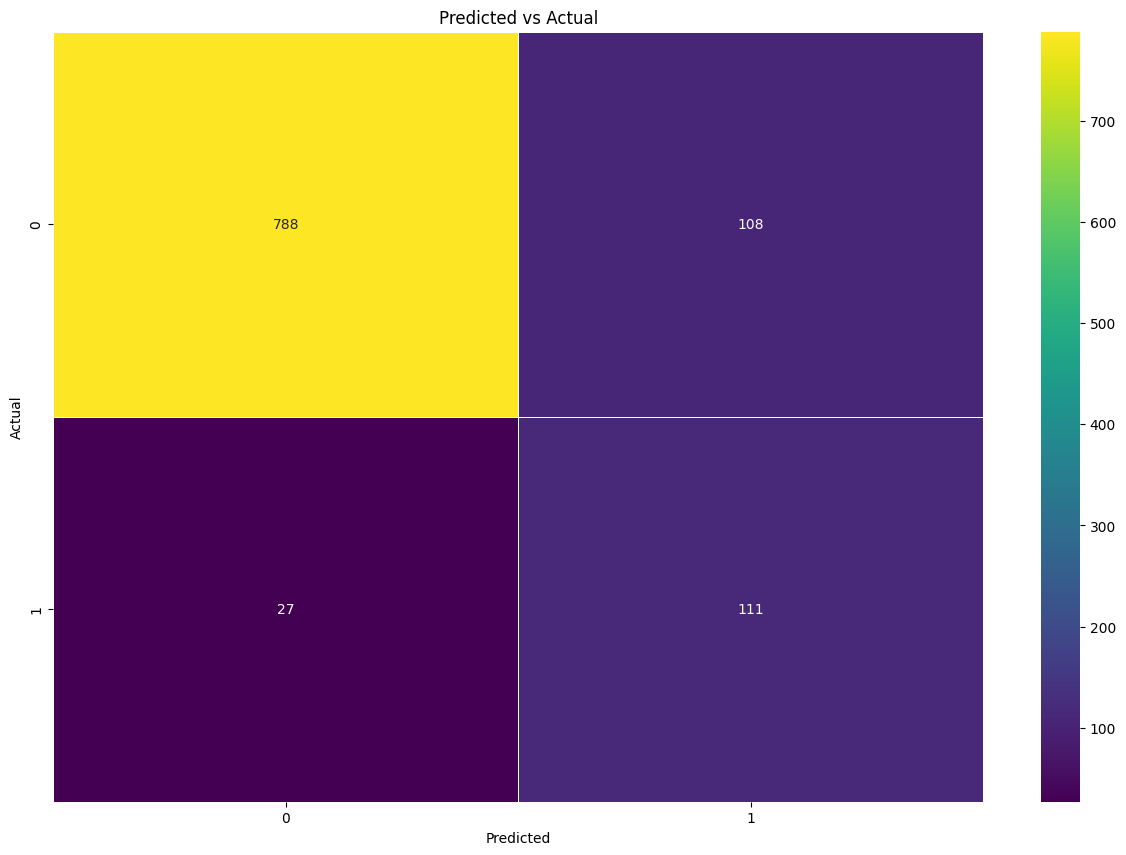

In [98]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))
cm_gnb = confusion_matrix(y_test, y_pred1);

Accurary score:  0.9709864603481625
Precision score:  1.0
recall score:  0.782608695652174
F1 score:  0.878048780487805
Classification report:                precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

Confusion maxtrix:
[[896   0]
 [ 30 108]]


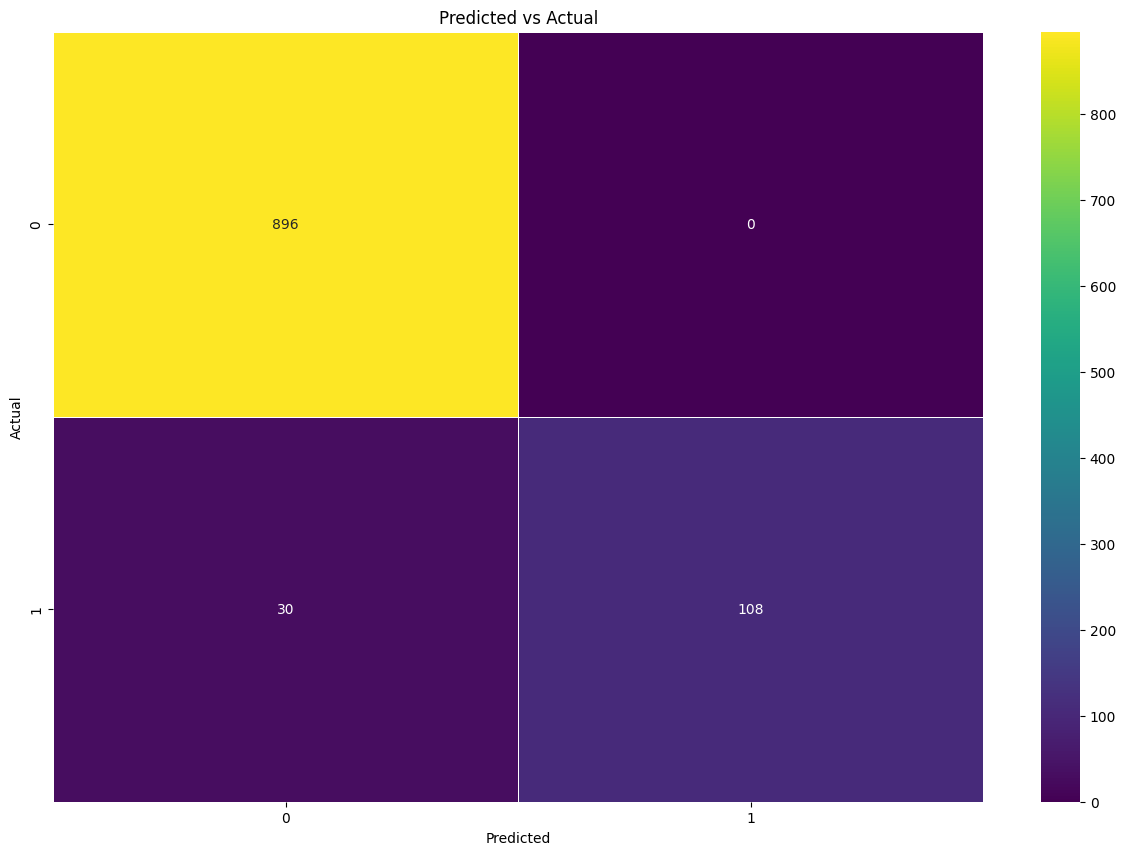

In [99]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))

cm_mnb = confusion_matrix(y_test, y_pred1);

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_mnb, annot=True, linewidth=0.5, fmt=".0f",cmap="viridis", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

Accurary score:  0.9835589941972921
Precision score:  0.991869918699187
recall score:  0.8840579710144928
F1 score:  0.9348659003831418
Classification report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       138

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Confusion maxtrix:
[[895   1]
 [ 16 122]]


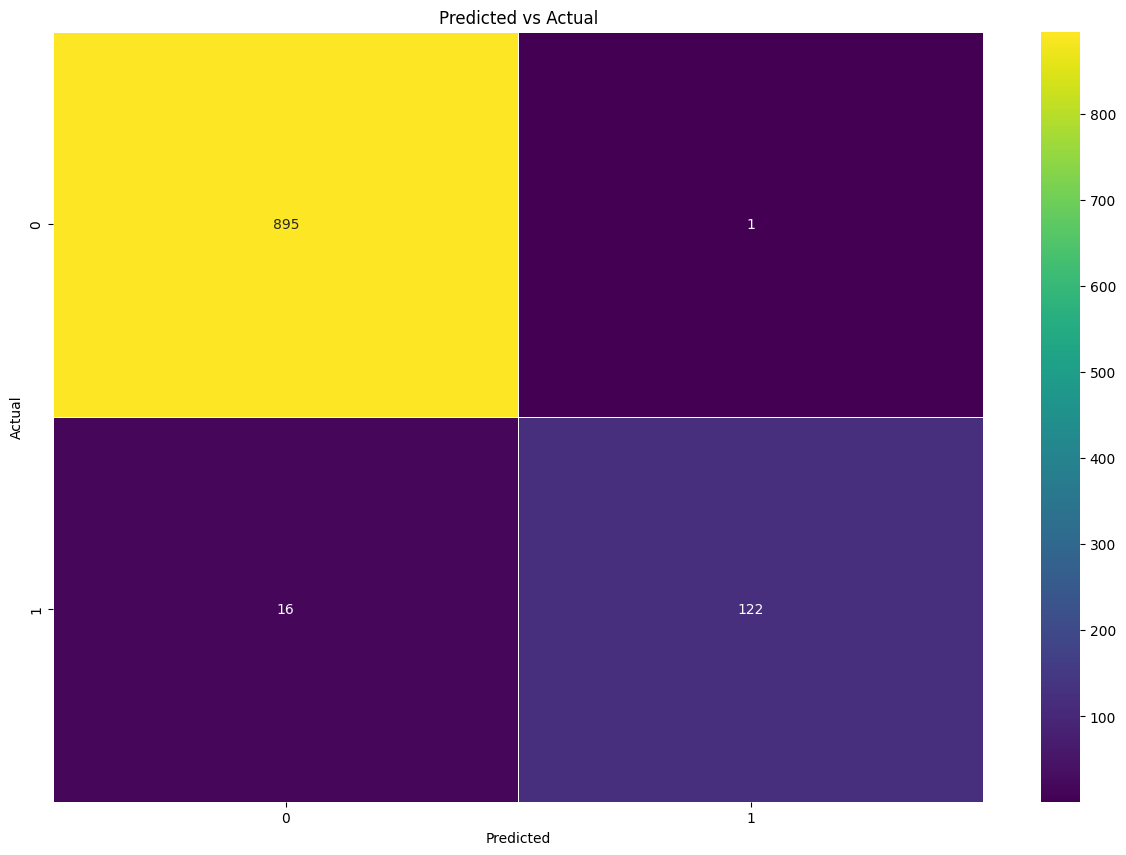

In [100]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print("Accurary score: ",accuracy_score(y_test, y_pred1))
print("Precision score: ", precision_score(y_test, y_pred1))
print("recall score: ", recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))
print("Classification report: ",classification_report(y_test, y_pred1))
print("Confusion maxtrix:")
print(confusion_matrix(y_test, y_pred1))

cm_bnb = confusion_matrix(y_test, y_pred1);

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_bnb, annot=True, linewidth=0.5, fmt=".0f",cmap="viridis", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

In [101]:
# tfidf --> MNB

In [102]:
import sys
!{sys.executable} -m pip install xgboost

In [103]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [104]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [105]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [106]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [107]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [108]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [109]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [110]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


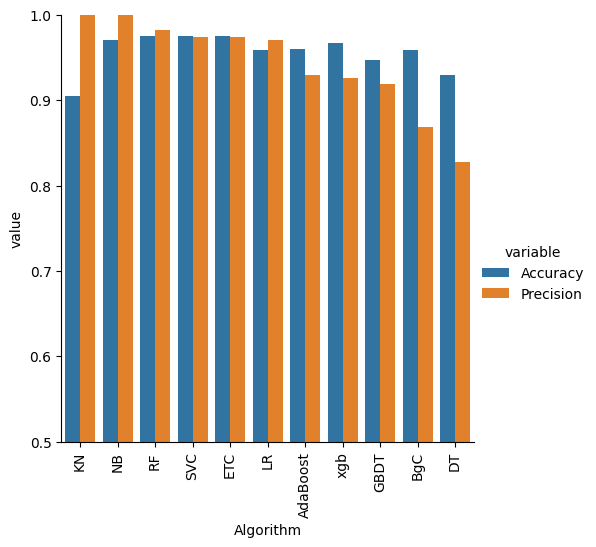

In [111]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [112]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [113]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [114]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [115]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [116]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [117]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [118]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [119]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [120]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [121]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [122]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [123]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [124]:
from sklearn.ensemble import StackingClassifier

In [125]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [126]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [127]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))